## Analyzing News Trends and Consumer Behavior. 

## 1. Introduction

On this platform, I'll conduct a series of analyses and visualizations using Python programming language, with data sourced from the "Internet News and Consumer Engagement" dataset on Kaggle. This dataset contains data on news articles published between early September to early November 2019. It's enriched by Facebook engagement data, such as the number of shares, comments, and reactions.

I'll begin by exploring the data to identify the publishers and authors who have published the most content. Following that, I'll delve into understanding the most engaging content based on user interaction metrics.

Next, I'll visualize the data using word clouds for the titles and descriptions of the articles to identify the most common words.

Finally, I'll analyze the text to identify common events or themes on days when the total engagement was higher than usual.

By combining data analysis and visualization techniques, I aim to gain deeper insights into how internet news impacts consumer behavior and engagement.

## 2. Dataset Information

- source_id: publisher unique identifier
- source_name: human-readable publisher name
- author: article author
- title: article headline
- description: article short description
- url: article URL from publisher website
- url_to_image: URL to main image associated with the article
- published_at: exact time and date of publishing the article
- content: unformatted content of the article truncated to 260 characters
- top_article: value indicating if article was listed as a top article on publisher website
- engagement_reaction_count: users reactions count for posts on Facebook involving article URL.
- engagement_share_count: users shares count for posts on Facebook involving article URL
- engagement_comment_count: users comments count for posts on Facebook involving article URL
- engagement_comment_plugin_count: users comments count for Facebook comment plugin on article website

## 3. Import Libraries

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string


## 4. Data Loading and Inspection

- Begin by loading the dataset into a Pandas DataFrame.
- Inspect the first few rows of the dataset to understand its structure and the type of data it contains.
- Check for any missing values or inconsistencies in the data.

In [210]:
data = open("D:\\articles_data.csv\\articles_data.csv")
data = pd.read_csv(data)
data.head()

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


In [211]:
# delete column "Unnamed"
data = pd.DataFrame(data)
data = data.drop('Unnamed: 0', axis=1)

data.head()

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   source_id                        10437 non-null  object 
 1   source_name                      10437 non-null  object 
 2   author                           9417 non-null   object 
 3   title                            10435 non-null  object 
 4   description                      10413 non-null  object 
 5   url                              10436 non-null  object 
 6   url_to_image                     9781 non-null   object 
 7   published_at                     10436 non-null  object 
 8   content                          9145 non-null   object 
 9   top_article                      10435 non-null  float64
 10  engagement_reaction_count        10319 non-null  float64
 11  engagement_comment_count         10319 non-null  float64
 12  engagement_share_c

In [213]:
data.describe()

,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
count,10435.000000,10319.000000,10319.000000,10319.000000,10319.000000
mean,0.122089,381.395290,124.032949,196.236263,0.011629
std,0.327404,4433.344792,965.351188,1020.680229,0.268276
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,8.000000,0.000000
75%,0.000000,43.000000,12.000000,47.500000,0.000000
max,1.000000,354132.000000,48490.000000,39422.000000,15.000000


In [214]:
data.isnull().sum()

source_id                             0
source_name                           0
author                             1020
title                                 2
description                          24
url                                   1
url_to_image                        656
published_at                          1
content                            1292
top_article                           2
engagement_reaction_count           118
engagement_comment_count            118
engagement_share_count              118
engagement_comment_plugin_count     118
dtype: int64

In [215]:
# Fill missing value in the "engagement_reaction_count" column with the mean value of the column
mean_reaction_count = data['engagement_reaction_count'].mean()
data['engagement_reaction_count'].fillna(mean_reaction_count, inplace=True)

In [216]:
# Fill missing value in the "engagement_comment_count" column with the mean value of the column
mean_comment_count = data['engagement_comment_count'].mean()
data['engagement_comment_count'].fillna(mean_comment_count, inplace=True)

In [217]:
# Fill missing value in the "engagement_share_count" column with the mean value of the column
mean_share_count = data['engagement_share_count'].mean()
data['engagement_share_count'].fillna(mean_share_count, inplace=True)

In [218]:
# Fill missing value in the "engagement_comment_plugin_count" column with the mean value of the column
mean_comment_plugin_count = data['engagement_comment_plugin_count'].mean()
data['engagement_comment_plugin_count'].fillna(mean_comment_plugin_count, inplace=True)

In [219]:
data.isnull().sum()

source_id                             0
source_name                           0
author                             1020
title                                 2
description                          24
url                                   1
url_to_image                        656
published_at                          1
content                            1292
top_article                           2
engagement_reaction_count             0
engagement_comment_count              0
engagement_share_count                0
engagement_comment_plugin_count       0
dtype: int64

In [220]:
# Drop rows with missing values across all columns
data.dropna(inplace=True)

# Reset the index after dropping rows
data.reset_index(drop=True, inplace=True)

In [221]:
data.isnull().sum()

source_id                          0
source_name                        0
author                             0
title                              0
description                        0
url                                0
url_to_image                       0
published_at                       0
content                            0
top_article                        0
engagement_reaction_count          0
engagement_comment_count           0
engagement_share_count             0
engagement_comment_plugin_count    0
dtype: int64

## 5. Exploratory Data Analysis (EDA)

- Identify the publishers and authors who have published the most content.
- Explore the distribution of engagement metrics such as reaction count, share count, and comment count.
- Analyze the distribution of top articles across publishers.

1. Identify the publishers and author who have published the most content

In [222]:
top_publishers = data['source_name'].value_counts().head(10)
print('\n Top Publishers: \n', top_publishers)


 Top Publishers: 
 source_name
Reuters               1239
The Irish Times       1104
Business Insider       982
The New York Times     860
BBC News               656
ABC News               578
Newsweek               539
CNN                    533
Al Jazeera English     468
CBS News               420
Name: count, dtype: int64


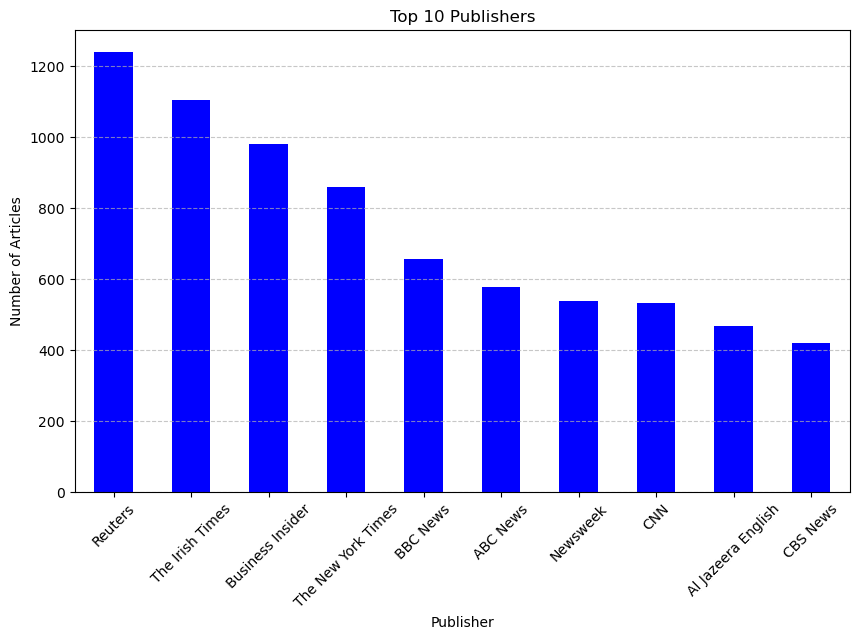

In [223]:
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar', color='blue')
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [224]:
top_authors = data['author'].value_counts().head(10)
print('\n Top Authors: \n', top_authors)


 Top Authors: 
 author
Reuters Editorial                   676
https://www.facebook.com/bbcnews    530
The Associated Press                425
Al Jazeera                          310
The Irish Times                     252
CBS News                            129
BBC News                            114
CBS/AP                               69
Dan Cancian                          45
AP                                   35
Name: count, dtype: int64


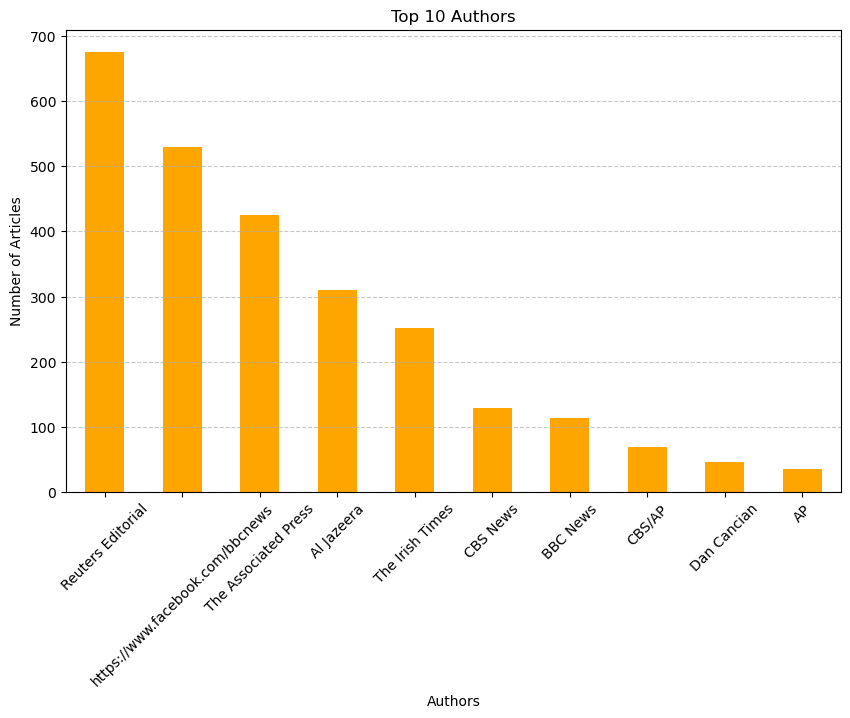

In [225]:
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='orange')
plt.title('Top 10 Authors')
plt.xlabel('Authors')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. Explore the distribution of engagement metrics

In [226]:
engagement_metrics = data[['engagement_reaction_count','engagement_comment_count','engagement_share_count','engagement_comment_plugin_count']]
engagement_summary = engagement_metrics.describe()
print('\n Engagement Metrics Summary: \n', engagement_summary)


 Engagement Metrics Summary: 
        engagement_reaction_count  engagement_comment_count  \
count                7720.000000               7720.000000   
mean                  380.801795                138.843241   
std                  2837.038217                977.428140   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     3.000000                  0.000000   
75%                    70.000000                 21.000000   
max                125106.000000              48490.000000   

       engagement_share_count  engagement_comment_plugin_count  
count             7720.000000                      7720.000000  
mean               230.732436                         0.012869  
std               1053.330134                         0.291686  
min                  0.000000                         0.000000  
25%                  1.000000                         0.000000  
50%                

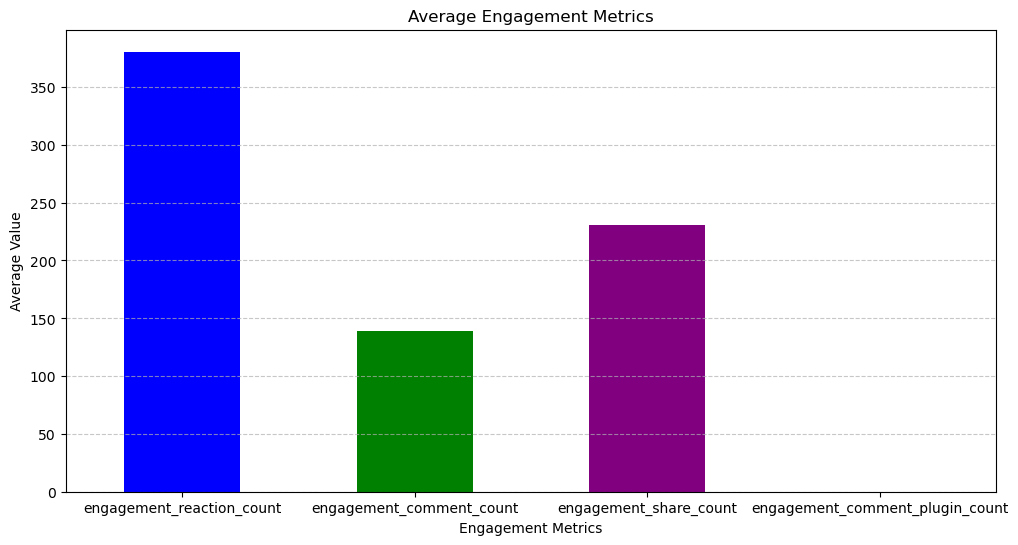

In [227]:
# Visualize the distribution of engagement metrics

# calculate the mean of engagement metrics
engagement_mean = engagement_metrics.mean()

# Plot the average engagement metrics
engagement_mean.plot(kind='bar', figsize=(12,6), color=['blue', 'green','purple','red'])
plt.title('Average Engagement Metrics')
plt.xlabel('Engagement Metrics')
plt.ylabel('Average Value')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


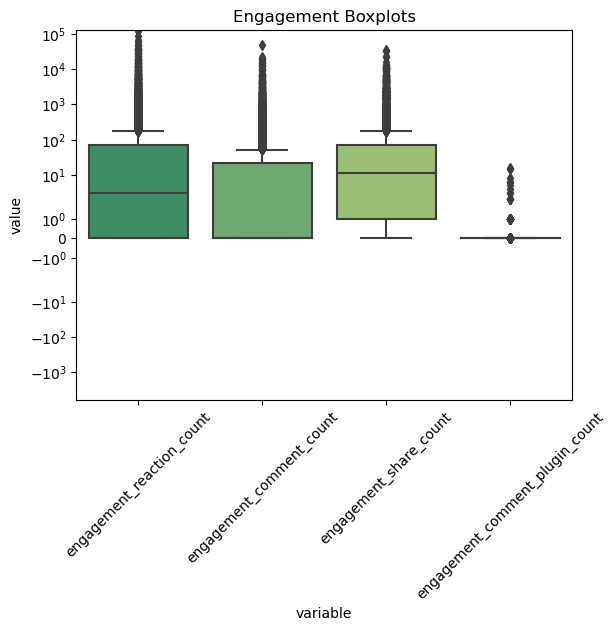

In [228]:
ax = sns.boxplot(x='variable', y='value', data=pd.melt(engagement_metrics), palette='summer')
ax.set_title('Engagement Boxplots')
plt.xticks(rotation=45)
ax.set_yscale('symlog')
plt.show()

3. Analyze the distribution of top articles across publishers

In [229]:
top_articles_distribution = data.groupby('source_name')['top_article'].value_counts()
print('\n Distribution of Top Articles across Publishers: \n', top_articles_distribution)


 Distribution of Top Articles across Publishers: 
 source_name              top_article
ABC News                 0.0             484
                         1.0              94
Al Jazeera English       0.0             432
                         1.0              36
BBC News                 0.0             545
                         1.0             111
Business Insider         0.0             852
                         1.0             130
CBS News                 0.0             332
                         1.0              88
CNN                      0.0             492
                         1.0              41
ESPN                     1.0              48
Newsweek                 0.0             503
                         1.0              36
Reuters                  0.0            1100
                         1.0             139
The Irish Times          0.0             975
                         1.0             129
The New York Times       0.0             795
           

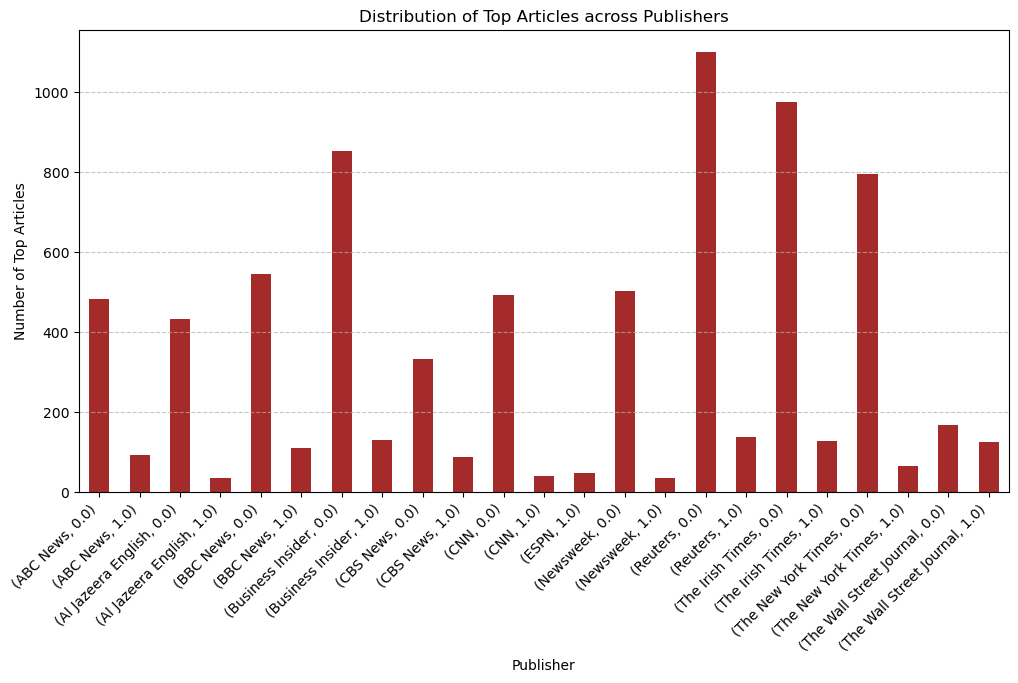

In [230]:
# Plot the distribution of top articles across publishers
top_articles_distribution.plot(kind='bar', figsize=(12,6), color='brown')
plt.title('Distribution of Top Articles across Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Top Articles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 6. Understanding Engaging Content

- Examine the relationship between engagement metrics and other attributes such as publisher, author, and article content.
- Identify the most engaging articles based on a combination of engagement metrics.

Relationship beetween atributes and engagement metrics

c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


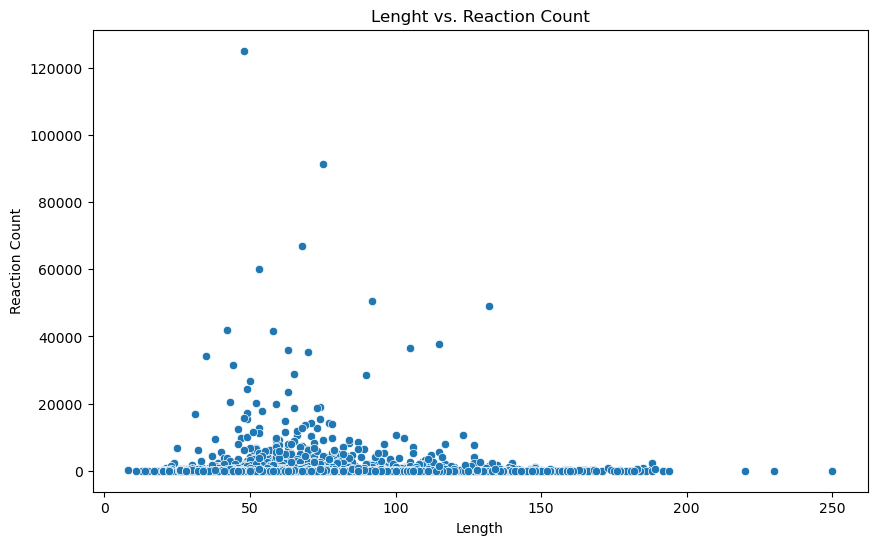

In [231]:
# Scatter plot of title length vs. engagement_reaction_count
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['title'].str.len(), y=data['engagement_reaction_count'], data=data)
plt.title('Lenght vs. Reaction Count')
plt.xlabel('Length')
plt.ylabel('Reaction Count')
plt.show()

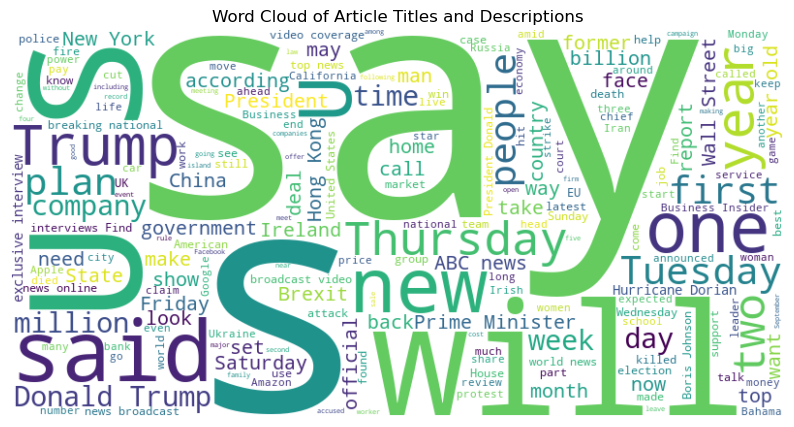

In [232]:
# Text analysis to identify popular topics or keywords
from wordcloud import WordCloud

# Combine title and description text
text = ' '.join(data['title'].fillna('')+''+data['description'].fillna(''))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Article Titles and Descriptions')
plt.axis('off')
plt.show()


## 7. Data Visualization

- Create visualizations to showcase the distribution of engagement metrics.
- Generate word clouds for article titles and descriptions to highlight common words and topics.

c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

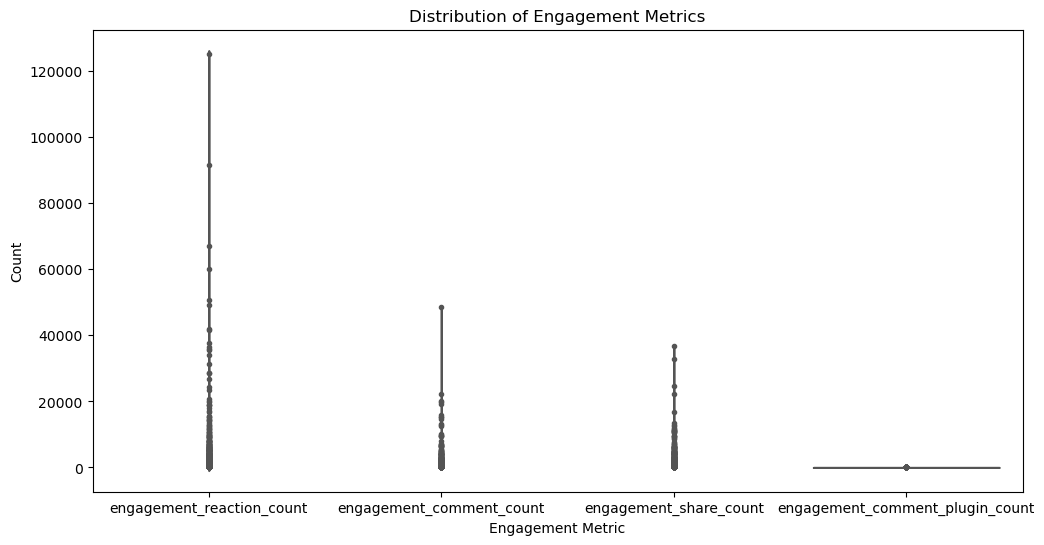

In [233]:
# Plot violin plots for each engagement metric
plt.figure(figsize=(12, 6))
sns.violinplot(data=engagement_metrics, inner="points", palette="muted")
plt.title('Distribution of Engagement Metrics')
plt.xlabel('Engagement Metric')
plt.ylabel('Count')
plt.show()

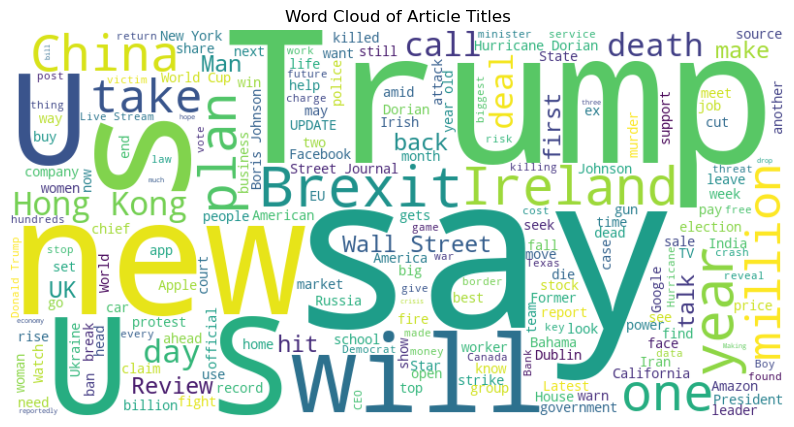

In [234]:
# Generate word cloud for article titles
title_text = ' '.join(data['title'].dropna())
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

# Display the word cloud for article titles
plt.figure(figsize=(10, 6))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Article Titles')
plt.axis('off')
plt.show()


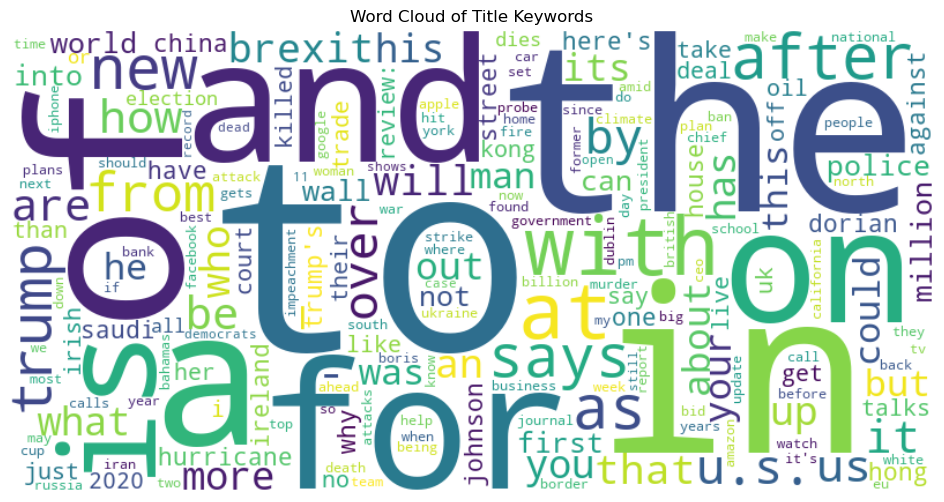

In [235]:
from collections import Counter

# Split title into separate lists of words
title_words = ' '.join(data['title'].fillna('').str.lower()).split()

# Count the occurrences of each word in titles
title_word_counts = Counter(title_words)

# Generate word clouds for title words words
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_word_counts)

# Display the word clouds
plt.figure(figsize=(12, 6))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Title Keywords')
plt.axis('off')


plt.show()


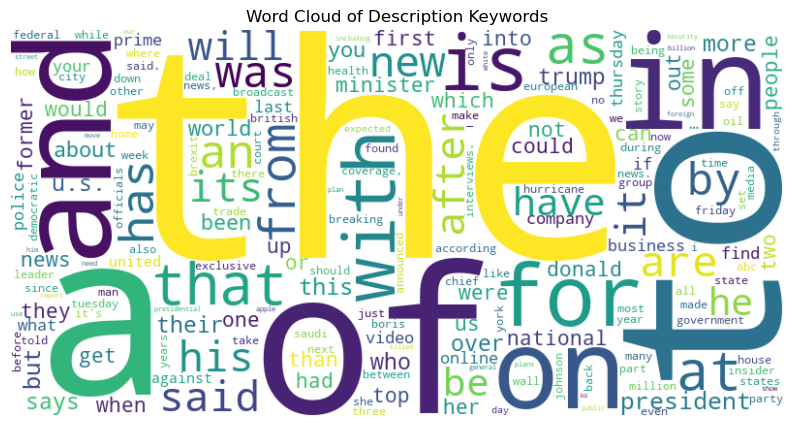

In [236]:
# Split description into separate lists of words
description_words = ' '.join(data['description'].fillna('').str.lower()).split()

# Count the occurrences of each word in descriptions
description_word_counts = Counter(description_words)

# Generate word clouds for description words
description_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(description_word_counts)

# Display the word clouds
plt.figure(figsize=(10, 6))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Description Keywords')
plt.axis('off')

plt.show()


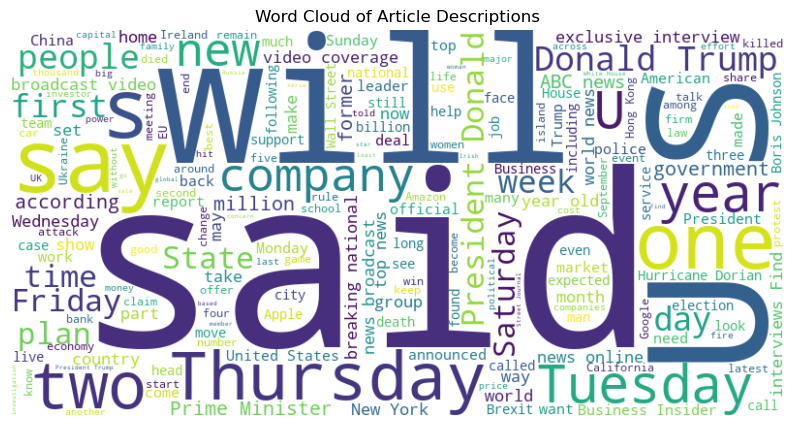

In [237]:
# Generate word cloud for article descriptions
description_text = ' '.join(data['description'].dropna())
description_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(description_text)

# Display the word cloud for article descriptions
plt.figure(figsize=(10, 6))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Article Descriptions')
plt.axis('off')
plt.show()

## 8. Text Analysis

- Preprocess the text data (titles and descriptions) by removing stop words, punctuation, and converting to lowercase.
- Analyze the text to identify common themes or topics using techniques like topic modeling or sentiment analysis.
- Explore whether there are specific keywords or phrases associated with higher engagement days.

In [238]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords and punctuation data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Quynh
[nltk_data]     Nhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Quynh
[nltk_data]     Nhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [239]:
# Preprocess text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['clean_title'] = data['title'].apply(preprocess_text)
data['clean_description'] = data['description'].apply(preprocess_text)
data.head()

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,clean_title,clean_description
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.00000,0.000000,2528.000000,0.000000,ntsb says autopilot engaged 2018 california te...,national transportation safety board said tues...
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.00000,10.000000,2.000000,0.000000,unemployment falls low,latest monthly figures reflect continued growt...
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,381.39529,124.032949,196.236263,0.011629,louise kennedy aw2019 long coats sparkling twe...,collection features designer glittering take b...
3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.00000,0.000000,7.000000,0.000000,north korean footballer han joins italian gian...,han first north korean player serie praised ap...
4,reuters,Reuters,Reuters Editorial,EU wants to see if lawmakers will block Brexit...,The European Union is waiting to see if Britis...,https://www.reuters.com/article/us-britain-eu-...,https://s2.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:25:41Z,LONDON (Reuters) - The European Union is waiti...,0.0,0.00000,0.000000,817.000000,0.000000,eu wants see lawmakers block brexit striking n...,european union waiting see british lawmakers b...


In [240]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob

In [241]:
# Topic modeling
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data['clean_title'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf)

# Display top words for each topic
def display_topics(model, feature_names, no_top_words):
    for index, topic in enumerate(model.components_):
        print(f"Topic {index + 1}:")
        print([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        print()

no_top_words = 10
display_topics(lda, tfidf_vectorizer.get_feature_names_out(), no_top_words)

# Sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

data['sentiment_score'] = data['clean_title'].apply(analyze_sentiment)

# Display average sentiment score
average_sentiment = data['sentiment_score'].mean()
print("Average Sentiment Score:", average_sentiment)


Topic 1:
['saudi', 'says', 'attacks', 'oil', 'facebook', 'trump', 'man', 'health', 'crash', 'school']

Topic 2:
['new', 'watch', 'know', 'climate', 'says', 'iphone', 'bahamas', 'college', 'need', '11']

Topic 3:
['brexit', 'trump', 'wall', 'new', 'street', 'eu', 'says', 'court', 'journal', 'chief']

Topic 4:
['says', 'new', 'ireland', 'johnson', 'brexit', 'world', 'mugabe', 'dorian', 'robert', 'make']

Topic 5:
['trump', 'impeachment', 'house', 'hong', 'kong', 'national', 'new', 'dorian', 'says', 'democrats']

Average Sentiment Score: 0.027355187321913357


In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data to obtain TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_title'])

# Get feature names (words) from TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Find top N keywords for each document
N = 5  # Number of keywords to extract
keywords_per_document = {}
for i, doc in enumerate(data['clean_title']):
    feature_index = tfidf_matrix[i,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])
    top_keywords = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:N]
    keywords_per_document[i] = [feature_names[i] for i, _ in top_keywords]

# Print top keywords for each document
for i, keywords in keywords_per_document.items():
    print(f"Document {i}: {keywords}")


Document 0: ['engaged', 'autopilot', 'ntsb', '2018', 'tesla']
Document 1: ['unemployment', 'falls', 'low']
Document 2: ['dresses', 'coats', 'knits', 'emerald', 'tweed']
Document 3: ['han', 'juventus', 'footballer', 'giants', 'joins']
Document 4: ['striking', 'lawmakers', 'block', 'wants', 'eu']
Document 5: ['refinitv', 'slightly', 'improves', 'profit', 'outlook']
Document 6: ['emotional', 'allowed', 'animals', 'flights', 'support']
Document 7: ['leo', 'monday', 'varadkar', 'meet', 'dublin']
Document 8: ['afghan', 'bring', 'peace', 'people', 'deal']
Document 9: ['hostility', 'daniil', 'rides', 'medvedev', 'wave']
Document 10: ['ftse', 'spencer', 'kicked', 'marks', '100']
Document 11: ['putney', 'suspects', 'detained', 'child', 'murder']
Document 12: ['leaves', 'children', 'school', 'dead', 'attack']
Document 13: ['suspends', 'efforts', 'guard', 'search', 'deadly']
Document 14: ['exchequer', 'budget', 'boost', 'ahead', 'government']
Document 15: ['muppets', 'resistance', 'thrones', 'crys

## 10. Time Series - Number of Engagement over month

- Spliting Date Time - "Published_at"
- Plot number of articles published per date
- Plot time series of engagement metrics over time

C:\Users\Quynh Nhu\AppData\Local\Temp\ipykernel_11400\199466711.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  articles_per_month = data.groupby(data['published_at'].dt.to_period('D')).size()


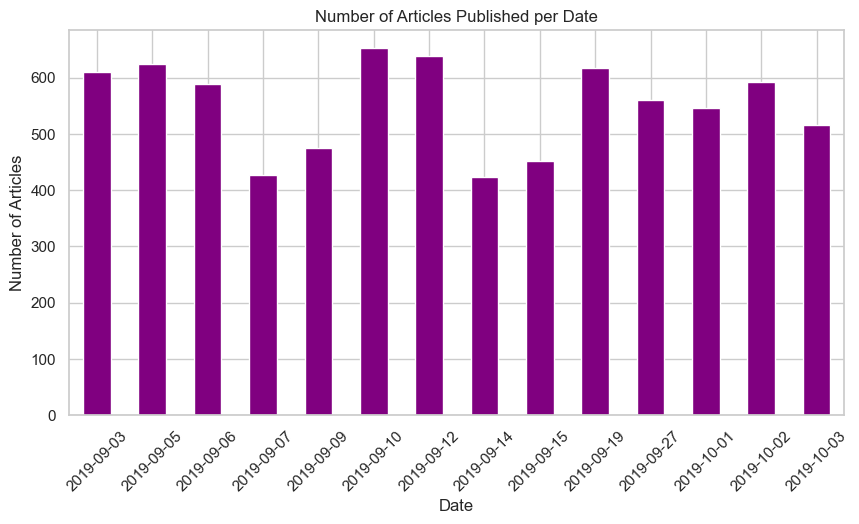

In [272]:
# Convert 'published_at' column to datetime format
data['published_at'] = pd.to_datetime(data['published_at'])

# Extract year, month, day, and hour components
data['year'] = data['published_at'].dt.year
data['month'] = data['published_at'].dt.month
data['day'] = data['published_at'].dt.day
data['hour'] = data['published_at'].dt.hour

# Plot number of articles published per date
articles_per_month = data.groupby(data['published_at'].dt.to_period('D')).size()
articles_per_month.plot(kind='bar', figsize=(10,5), color='purple')
plt.title('Number of Articles Published per Date')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


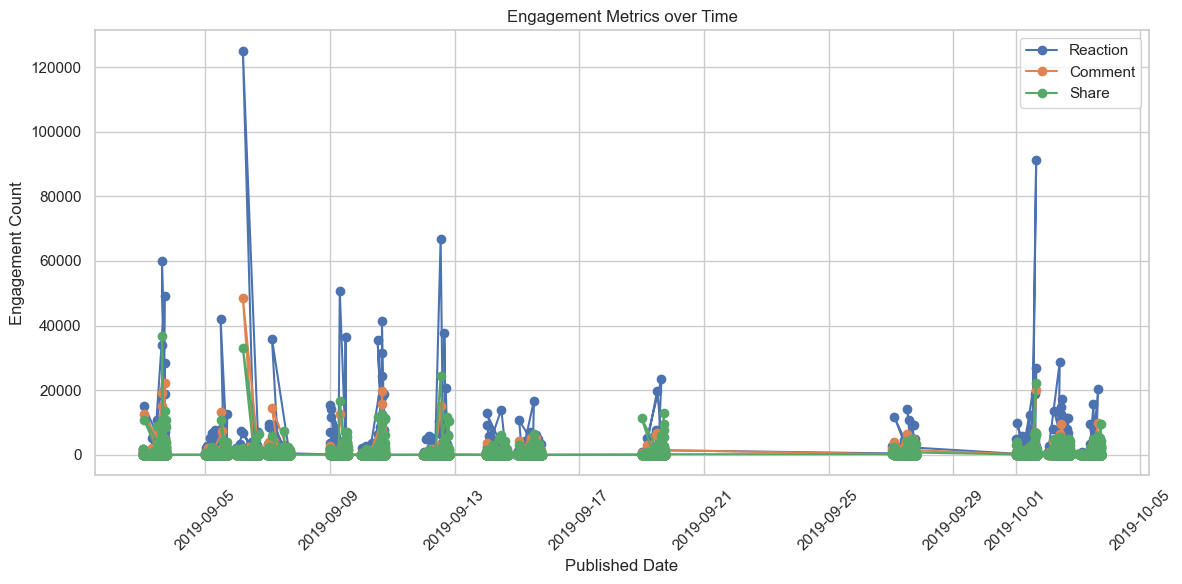

In [271]:
# Convert 'published_at' column to datetime format
data['published_at'] = pd.to_datetime(data['published_at'])

# Plot time series of engagement metrics over time
plt.figure(figsize=(12, 6))

plt.plot(data['published_at'], data['engagement_reaction_count'], marker='o', linestyle='-', label='Reaction')
plt.plot(data['published_at'], data['engagement_comment_count'], marker='o', linestyle='-', label='Comment')
plt.plot(data['published_at'], data['engagement_share_count'], marker='o', linestyle='-', label='Share')

plt.title('Engagement Metrics over Time')
plt.xlabel('Published Date')
plt.ylabel('Engagement Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()